In [192]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Activation vs repression

## Imports

In [193]:
import os
import pandas as pd
import re

from synbio_morpher.utils.misc.type_handling import flatten_listlike
from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict
from synbio_morpher.srv.io.manage.script_manager import script_preamble
from synbio_morpher.utils.misc.string_handling import string_to_tuple_list
from synbio_morpher.utils.misc.type_handling import get_nth_elements

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import jax
import subprocess

from run_bpRNA import aggregate_motifs, run_bpRNA




## Load data

In [212]:
fn_inter = os.path.join('..', 'data', 'sRNA', 'merged_inter.csv')
fn_merged = os.path.join('..', 'data', 'sRNA', 'merged_EcoCyc_RNAInter_sRNATarBase.csv')
data = pd.read_csv(fn_inter)
merged = pd.read_csv(fn_merged)
try:
    data = data.drop(columns=['Unnamed: 0'])
    merged = merged.drop(columns=['Unnamed: 0'])
except:
    pass


# Binding energy differences 

In [218]:
interaction_data = load_json_as_dict('./data/05_orthogonality_mRNA_official/2023_11_21_095238/inter_data_raw.json')
interaction_data = load_json_as_dict('./data/tests/2023_11_28_205928/inter_data_raw.json')
len(interaction_data)

3

In [219]:
interaction_data

{'syn_chiX': {'EGFP': {'id1': 'EGFP',
   'id2': 'syn_chiX',
   'E': '-7.07',
   'E_norm': '-0.637505',
   'bpList': '(469,54):(470,53):(471,52):(473,50):(474,49):(475,48):(476,47):(477,46):(478,45):(479,44)',
   'hybridDPfull': '....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................(((.(((((((.................................................................................................................................................................................................................................................&...........................................)))))))

In [216]:
data['Interaction Energy'] = 0.0
data['bpList'] = ''
data['hybridDPfull'] = ''
data['seedPu1'] = ''
data['seedPu2'] = ''
for k1 in interaction_data:
    for k2, v in interaction_data[k1].items():
        i1, i2 = k1, k2
        if k1 in data['Interactor 1'].to_list():
            i1, i2 = k1, k2
            # data.loc[(data['Interactor 1'] == k1) & (data['Interactor 2'] == k2), 'Interaction Energy'] = float(v['E'])
            # data.loc[(data['Interactor 1'] == k1) & (data['Interactor 2'] == k2), 'bpList'] = v['bpList']
            # data.loc[(data['Interactor 1'] == k1) & (data['Interactor 2'] == k2), 'hybridDPfull'] = v['hybridDPfull']
            # data.loc[(data['Interactor 1'] == k1) & (data['Interactor 2'] == k2), 'seedPu1'] = v['seedPu1']
            # data.loc[(data['Interactor 1'] == k1) & (data['Interactor 2'] == k2), 'seedPu2'] = v['seedPu2']
        elif k2 in data['Interactor 1'].to_list():
            i1, i2 = k2, k1
            # data.loc[(data['Interactor 1'] == k2) & (data['Interactor 2'] == k1), 'Interaction Energy'] = float(v['E'])
            # data.loc[(data['Interactor 1'] == k2) & (data['Interactor 2'] == k1), 'bpList'] = v['bpList']
            # data.loc[(data['Interactor 1'] == k2) & (data['Interactor 2'] == k1), 'hybridDPfull'] = v['hybridDPfull']
            # data.loc[(data['Interactor 1'] == k2) & (data['Interactor 2'] == k1), 'seedPu1'] = v['seedPu1']
            # data.loc[(data['Interactor 1'] == k2) & (data['Interactor 2'] == k1), 'seedPu2'] = v['seedPu2']
        else:
            print(k1, k2)
        data.loc[(data['Interactor 1'] == i1) & (data['Interactor 2'] == i2), 'Interaction Energy'] = float(v['E'])
        data.loc[(data['Interactor 1'] == i1) & (data['Interactor 2'] == i2), 'bpList'] = v['bpList']
        data.loc[(data['Interactor 1'] == i1) & (data['Interactor 2'] == i2), 'hybridDPfull'] = v['hybridDPfull']
        data.loc[(data['Interactor 1'] == i1) & (data['Interactor 2'] == i2), 'seedPu1'] = v['seedPu1']
        data.loc[(data['Interactor 1'] == i1) & (data['Interactor 2'] == i2), 'seedPu2'] = v['seedPu2']
            
data

        

KeyError: 'seedPu1'

In [217]:
list(map(lambda x: np.mean([float(xx) for xx in x if xx]), data['seedPu1'].str.split(':')))

/home/wadh6511/Kode/env_evo/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wadh6511/Kode/env_evo/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [198]:
data['Regulation'] = data['Regulation'].apply(lambda x: x if type(x) == str else 'Unknown')

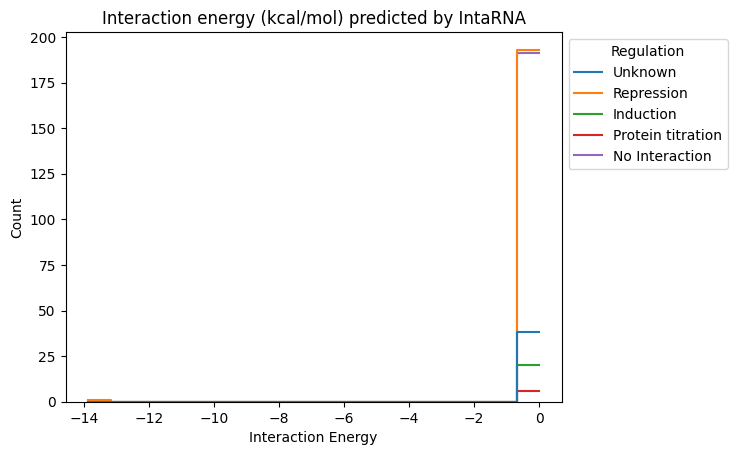

In [199]:
g = sns.histplot(data, x='Interaction Energy', hue='Regulation', element='step', bins=20, fill=False)
plt.title('Interaction energy (kcal/mol) predicted by IntaRNA')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


Text(0.5, 1.0, 'Distal binding by regulation mechanism')

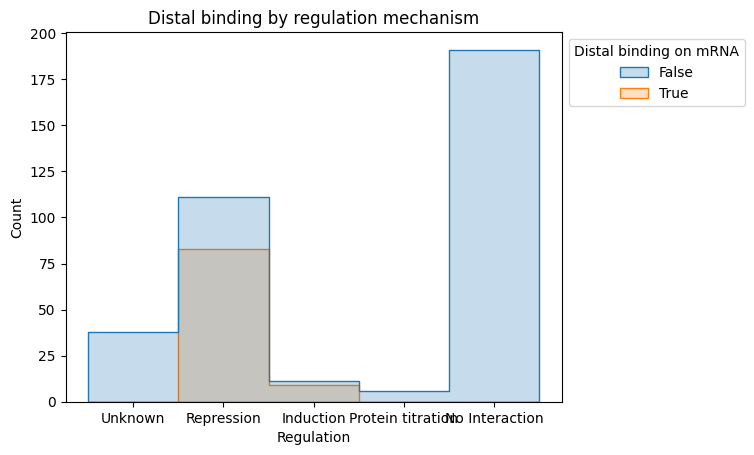

In [200]:
g = sns.histplot(data, x='Regulation', hue=data['Binding position 2'].apply(lambda x: '-' in x if type(x) == str else False), element='step')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.legend_.set_title('Distal binding on mRNA')
plt.title('Distal binding by regulation mechanism')

# Motif differences between activation / repression

In [201]:
load_dir_st = './data/tests/2023_11_30_120342/st'

if not load_dir_st:
    config = {
        "experiment": {
            "purpose": "tests",
            "no_visualisations": False,
            "no_numerical": False,
            "debug_mode": False
        }
    }
    data_writer = None
    config, data_writer = script_preamble(config, data_writer)
    
    run_bpRNA(interaction_data, merged, data_writer)
    
    load_dir_st = os.path.join(data_writer.write_dir, 'st')


In [202]:
motifs = aggregate_motifs(sim_data=interaction_data, dir_st=load_dir_st)


In [203]:
motifs['Regulation'] = ''
# motifs[('Num in seq', 'Regulation')] = ''

for i, r in data.iterrows():
    i1 = r['Interactor 1']
    i2 = r['Interactor 2']
    motifs.loc[(motifs['sRNA'] == i1) & (motifs['Target'] == i2), 'Regulation'] = r['Regulation']
    # data.loc[i, 'Num in seq'] = motifs[(motifs['sRNA'] == i1) & (motifs['Target'] == i2)]['Num in seq']
    # data.loc[i, 'Mean Length'] = motifs[(motifs['sRNA'] == i1) & (motifs['Target'] == i2)]['Mean Length']

KeyError: 'sRNA'

Text(0.5, 0.98, 'Regulations across motifs')

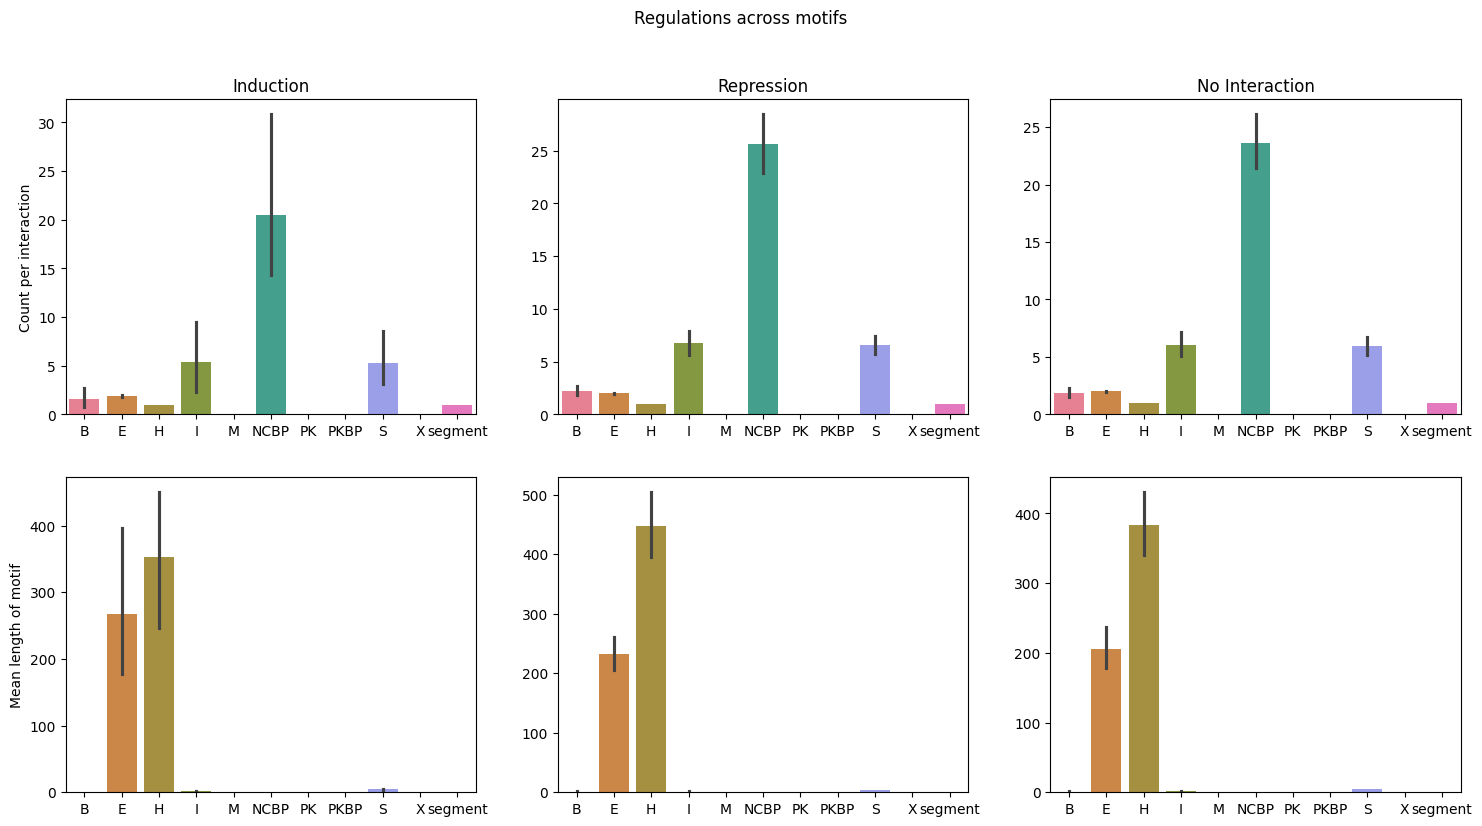

In [ ]:
inductions = ['Induction', 'Repression', 'No Interaction']

fig = plt.figure(figsize=(18, 9))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
for i, n in enumerate(inductions):
    ax = plt.subplot(2,len(inductions),i+1)
    sns.barplot(motifs[motifs['Regulation'] == n]['Num in seq'])
    # sns.histplot(motifs[motifs['Regulation'] == n]['Num in seq'], x=motifs['Num in seq'].columns[2], hue='Regulation')
    plt.title(n)
    if i == 0:
        plt.ylabel('Count per interaction')

for i, n in enumerate(inductions):
    ax = plt.subplot(2,len(inductions),i+1+len(inductions))
    sns.barplot(motifs[motifs['Regulation'] == n]['Mean Length'])
    if i == 0:
        plt.ylabel('Mean length of motif')

plt.suptitle('Regulations across motifs')

# Sequence differences

In [ ]:
data['bpList_first'] = get_nth_elements(data['bpList'].apply(lambda bb: string_to_tuple_list(bb)), empty_replacement=[], n=0)
data['bpList_second'] = get_nth_elements(data['bpList'].apply(lambda bb: string_to_tuple_list(bb)), empty_replacement=[], n=1)

In [ ]:
data['Sequence 2 bpseqs'] = list(map(lambda x: x[0][x[1][0]:x[1][-1]] if x[1] else '', zip(data['Sequence 2'].to_list(), data['bpList_first'].to_list())))
data['Sequence 1 bpseqs'] = list(map(lambda x: x[0][x[1][-1]:x[1][0]] if x[1] else '', zip(data['Sequence 1'].to_list(), data['bpList_second'].to_list())))

### GC Content

In [ ]:
data['GC content 2'] = data['Sequence 2 bpseqs'].apply(lambda x: sum([1 for xx in x if xx == 'C' or (xx == 'G')]) / len(x) if x else 0)
data['GC content 1'] = data['Sequence 1 bpseqs'].apply(lambda x: sum([1 for xx in x if xx == 'C' or (xx == 'G')]) / len(x) if x else 0)
data['AU content 2'] = data['Sequence 2 bpseqs'].apply(lambda x: sum([1 for xx in x if xx == 'A' or (xx == 'U')]) / len(x) if x else 0)
data['AU content 1'] = data['Sequence 1 bpseqs'].apply(lambda x: sum([1 for xx in x if xx == 'A' or (xx == 'U')]) / len(x) if x else 0)

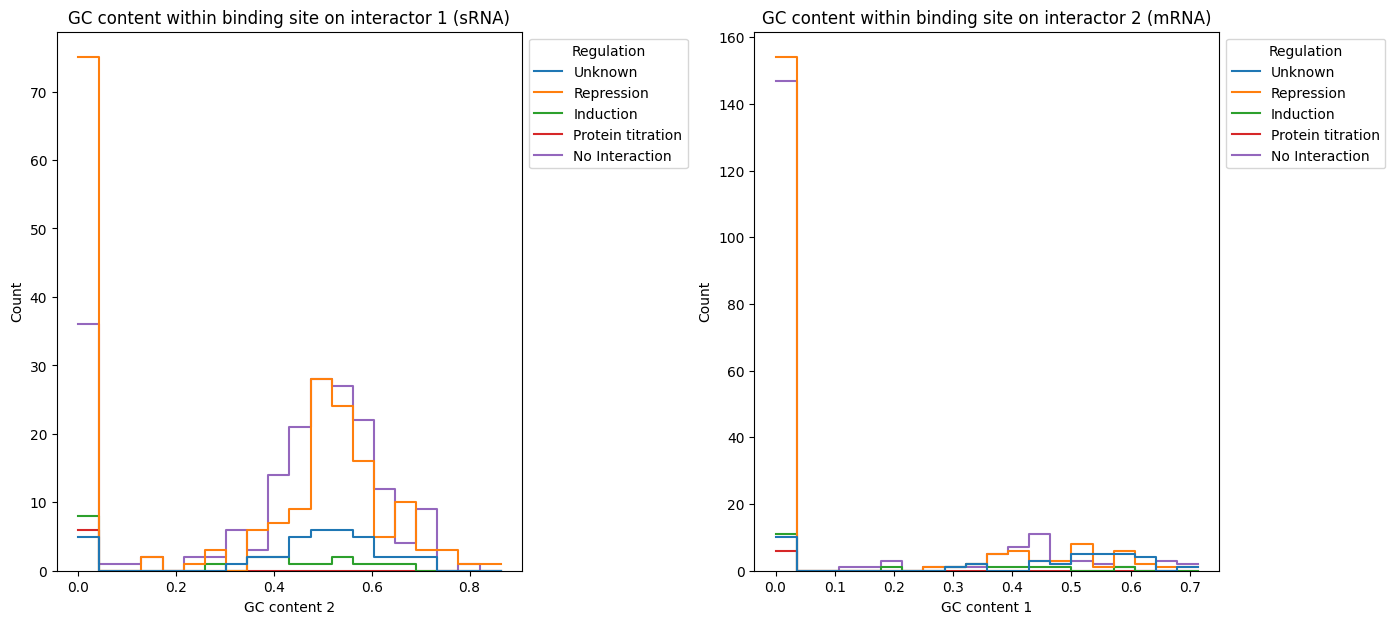

In [ ]:

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1)
g = sns.histplot(data, x='GC content 2', hue='Regulation', element='step', bins=20, fill=False)
plt.title('GC content within binding site on interactor 1 (sRNA)')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

ax = plt.subplot(1,2,2)
g = sns.histplot(data, x='GC content 1', hue='Regulation', element='step', bins=20, fill=False)
plt.title('GC content within binding site on interactor 2 (mRNA)')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


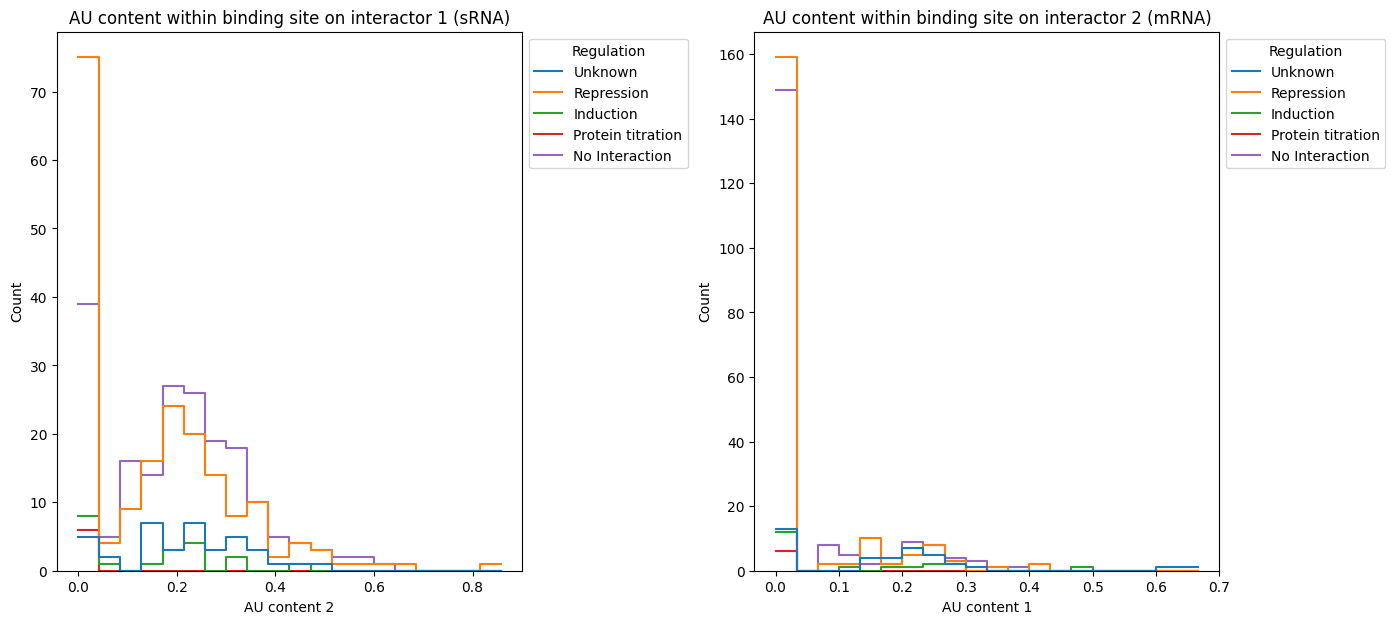

In [ ]:

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1)
g = sns.histplot(data, x='AU content 2', hue='Regulation', element='step', bins=20, fill=False)
plt.title('AU content within binding site on interactor 1 (sRNA)')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

ax = plt.subplot(1,2,2)
g = sns.histplot(data, x='AU content 1', hue='Regulation', element='step', bins=20, fill=False)
plt.title('AU content within binding site on interactor 2 (mRNA)')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


# Binding site differences

# Protein involvements